# CSE 5243 - Introduction to Data Mining
## Homework 2: Classification
- Semester: Fall 2022
- Instructor: John Paparrizos / Tom Bihari
- Section: Wednesday/Friday 11:10 AM
- Student Name: Ziyi Wang
- Student Email: smith.12345@osu.edu
- Student ID: 123456789
***

# Introduction

### Objectives

In this lab, you will use the "Cleveland Data CLEANED AND TRIMMED.csv" heart disease dataset provided on Carmen.  It is a subset of the "Cleveland" dataset that can be found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

You will configure, execute, and evaluate an off-the-shelf K-Nearest-Neighbor classifier and two other classifiers you choose.

The objectives of this assignment are:
1.	Understand how to evaluate classifiers based on business criteria.
2.	Understand how to tune and evaluate a classifier to achieve good performance.
3.	Understand how to select and evaluate suitable off-the-shelf classifiers based on the characteristics of a dataset and the outcomes you need.

### Problem Statement

You work for a medical institution that wants to improve the heart health of its patients.  You have obtained a dataset that contains a variety of demographic and health-related information for a group of patients.  It also includes a CLASS variable "num" that indicates the heart health of each of the patients.  The values are:

0. No heart health issues / risk
1. Slight heart health issues / risk
2. Moderate heart health issues / risk
3. High heart health issues / risk
4. Extreme heart health issue / risk

You have been asked to develop a classifier based on the dataset data, to predict the CLASS of new patients so they can be enrolled in interventions based on their demographic data.

The COSTs of the interventions are as follows, based on the predicted class of each patient

0) Tiny intervention: 100 (dollars)
1) Minor intervention: 200
2) Moderate intervention: 300
3) Significant intervention: 400
4) Extreme intervention: 500

The BENEFITs of the interventions are as follows:

- If the classification is correct and the correct intervention given to the patient: 500 * (TRUE_CLASS + 1)
- If an incorrect classification is made and the wrong intervention is given to the patient: 0

You would like to find a classifier that maximizes the overall **NET_BENEFIT = BENEFIT - COST**. Therefore, a larger positive number is a good outcome.

So, for example:

- If a patient's true class is 4 and their predicted class is 0, their NET_BENEFIT = 0 - 100 = -100
- If a patient's true class is 4 and they are correctly classified, their NET_BENEFIT is 500*(4+1) - 500 = 2000

The medical institution would like you to evaluate the use of a K-Nearest-Neighbor classifier as a starting point.  You agree to do so, as long as you then can choose a different classifier if you are not satisfied with KNN.

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.

### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (5%)
> - Is it well organized and does the presentation flow in a logical manner?
> - Are there no grammar and spelling mistakes?
> - Do the charts/graphs relate to the text?
> - Are the summarized key points and findings understandable by non-experts?
> - Do the Overview and Conclusions provide context for the entire exercise?
2.	Evaluation Method (10%)
> - Does your evaluation method meet the needs of the developer (you) as well as the needs of your business stakeholders?
> - Is the evaluation method sound?
> - Did you describe both the method itself and why you chose it?
3.	Pre-Processing of the Dataset (10%)
> - Did you make reasonable choices for pre-processing, and explain why you made them?
4.	Evaluation of the KNN Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
5.	Evaluation of the Second Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
6.	Evaluation of the Third Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
7.	Comparison of the Three Classifiers (10%)
> - Is the comparison sound?
> - Did you choose a specific classifier as best and explain why?
8.  Conclusions (5%)
> - Did you summarize appropriately your critical findings. 
> - Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	Project2_Surname_DotNumber.zip

The submitted file should be less than 10MB.

***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

In this home work, first understanding the dataset well, and define the evaluation method. Then preprocessing the data will lead to better prediction results. Three classifiers are applied to the dataset and the results are compared to find out which one is the best.This HW will help us better understanging the Application of classifier.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn import datasets


***
# Section: 1 - Evaluation Method
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
- (e.g., confusion matrices, accuracy, precision, recall, F-measures, etc.).
- Consider using: from sklearn.metrics import classification_report, confusion_matrix
***

In [2]:
def accuracy(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    return acc

***
## Section: 1.2 - Define measures that do include the cost information
- (e.g., using cost matrices).
- Consider creating a function that takes a confusion matrix and calculates the cost, like this:
***

In [3]:
# def calculate_cost(conf_matrix):
# # Fill in the cost matrix values
# #                           PREDICTED VALUES
# #                      0     1     2     3     4
#     cost_matrix = [[1234, 1234, 1234, 1234, 1234],   # 0
#                    [1234, 1234, 1234, 1234, 1234],   # 1
#                    [1234, 1234, 1234, 1234, 1234],   # 2  TRUE VALUES
#                    [1234, 1234, 1234, 1234, 1234],   # 3
#                    [1234, 1234, 1234, 1234, 1234]]   # 4
#     total = 0
#     for r in range(0, 5):
#         for c in range(0, 5):
#             total = total + cost_matrix[r][c] * conf_matrix[r][c]

# # OR... THIS WORKS      total = np.dot(np.array(conf_matrix).ravel(), np.array(cost_matrix).ravel())
#     return total

As can see the cell 104, we can use this example to creat a function that takes a confusionn matrix and benefit

In [4]:
def calculate_cost(conf_matrix):
    cost_matrix = [[ 100,   200,  300,  400,  500], # 0
                    [ 100,   200,  300,  400,  500],# 1
                    [ 100,   200,  300,  400,  500],# 2 
                    [ 100,   200,  300,  400,  500],# 3
                    [ 100,   200,  300,  400,  500]]# 4
    total = 0
    for r in range(0, 5):
        for c in range(0, 5):
            total = total + cost_matrix[r][c] * conf_matrix[r][c]
    return total

In [5]:
def calculate_benefit(conf_matrix):
    cost_matrix = [[ 500,    0,    0,    0,    0],# 0
                  [   0,  1000,   0,    0,    0],# 1
                  [   0,    0,  1500,   0,    0],# 2 
                  [   0,    0,    0,  2000,   0],# 3
                  [   0,    0,    0,    0, 2500]]# 4
    total = 0
    for r in range(0, 5):
        for c in range(0, 5):
            total = total + cost_matrix[r][c] * conf_matrix[r][c]
    return total

In [6]:
def calculate_net_benefit(conf_matrix):
    cost = calculate_cost(conf_matrix)
    benefit = calculate_benefit(conf_matrix)
    net_benefit = calculate_benefit(conf_matrix) - calculate_cost(conf_matrix)
    return net_benefit

***
# Section: 2 - Pre-Processing of the Dataset
- Use the provided dataset.  Split it into a Training dataset and a Test dataset based on the class attribute.  Keep them separate and use the Training dataset for training/tuning and the Test dataset for testing. For consistency, use the **train_test_split** operation available in SciKit Learn (use a specific random seed, so it is reproducible).
  - from sklearn.model_selection import train_test_split
  - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
***

***
## Section: 2.1 - Explore the attributes
- As in Homework 1, explore the attributes briefly. Reference the website listed in the Introduction.
- Provide basic statistics for the attributes.
- List which attributes are Nominal (even though they are encoded as numbers), Ordinal, Interval, Ratio.
***

ordinal: id, age, trestbps, oldpeak, ca

Ratio :chol,thalach

nominal: sex, cp, restecg, exang, slope, thal, num

interval: fbs





In [7]:
forest = pd.read_csv("Desktop/5243HW2/Cleveland Data CLEANED AND TRIMMED.csv")
forest

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,278,39,0,3,138,220,0,0,152,0,0.0,2,0,3,0
278,279,57,1,2,154,232,0,2,164,0,0.0,1,1,3,1
279,280,58,0,4,130,197,0,0,131,0,0.6,2,0,3,0
280,281,57,1,4,110,335,0,0,143,1,3.0,2,1,7,2


In [8]:
forest.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,141.500000,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.595745,4.581560,0.907801
std,81.550598,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,1.236910,2.248467,1.224894
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
25%,71.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,141.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,211.750000,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,282.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Basic statistics for the attributes.

In [9]:
forest.mean()


id          141.500000
age          54.411348
sex           0.677305
cp            3.163121
trestbps    131.563830
chol        249.092199
fbs           0.148936
restecg       1.014184
thalach     149.765957
exang         0.326241
oldpeak       1.026950
slope         1.585106
ca            0.595745
thal          4.581560
num           0.907801
dtype: float64

In [10]:
forest.median()


id          141.5
age          55.0
sex           1.0
cp            3.0
trestbps    130.0
chol        244.0
fbs           0.0
restecg       2.0
thalach     153.5
exang         0.0
oldpeak       0.8
slope         2.0
ca            0.0
thal          3.0
num           0.0
dtype: float64

In [11]:
forest.quantile(q = [0,  0.1, 0.25, 0.5, 0.75, 0.9,  1])


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0.00,1.00,29.0,0.0,1.0,94.0,126.0,0.0,0.0,71.00,0.0,0.0,1.0,-9.0,-9.0,0.0
0.10,29.10,42.0,0.0,2.0,110.0,196.0,0.0,0.0,116.00,0.0,0.0,1.0,0.0,3.0,0.0
0.25,71.25,48.0,0.0,3.0,120.0,213.0,0.0,0.0,133.25,0.0,0.0,1.0,0.0,3.0,0.0
0.50,141.50,55.0,1.0,3.0,130.0,244.0,0.0,2.0,153.50,0.0,0.8,2.0,0.0,3.0,0.0
0.75,211.75,61.0,1.0,4.0,140.0,277.0,0.0,2.0,165.75,1.0,1.6,2.0,1.0,7.0,2.0
0.90,253.90,66.0,1.0,4.0,152.0,308.9,1.0,2.0,177.90,1.0,2.6,2.0,2.0,7.0,3.0
1.00,282.00,77.0,1.0,4.0,200.0,564.0,1.0,2.0,202.00,1.0,6.2,3.0,3.0,7.0,4.0


In [12]:
forest.std()


id          81.550598
age          9.053083
sex          0.468338
cp           0.955405
trestbps    17.757496
chol        51.217546
fbs          0.356658
restecg      0.998118
thalach     22.923869
exang        0.469670
oldpeak      1.138825
slope        0.609700
ca           1.236910
thal         2.248467
num          1.224894
dtype: float64

Model Training

In [13]:
forest.shape

(282, 15)

In [14]:
forest.head(5)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [15]:
 forest.describe()


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,141.500000,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.595745,4.581560,0.907801
std,81.550598,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,1.236910,2.248467,1.224894
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
25%,71.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,141.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,211.750000,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,282.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [16]:
 forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        282 non-null    int64  
 1   age       282 non-null    int64  
 2   sex       282 non-null    int64  
 3   cp        282 non-null    int64  
 4   trestbps  282 non-null    int64  
 5   chol      282 non-null    int64  
 6   fbs       282 non-null    int64  
 7   restecg   282 non-null    int64  
 8   thalach   282 non-null    int64  
 9   exang     282 non-null    int64  
 10  oldpeak   282 non-null    float64
 11  slope     282 non-null    int64  
 12  ca        282 non-null    int64  
 13  thal      282 non-null    int64  
 14  num       282 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 33.2 KB


***
## Section: 2.2 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

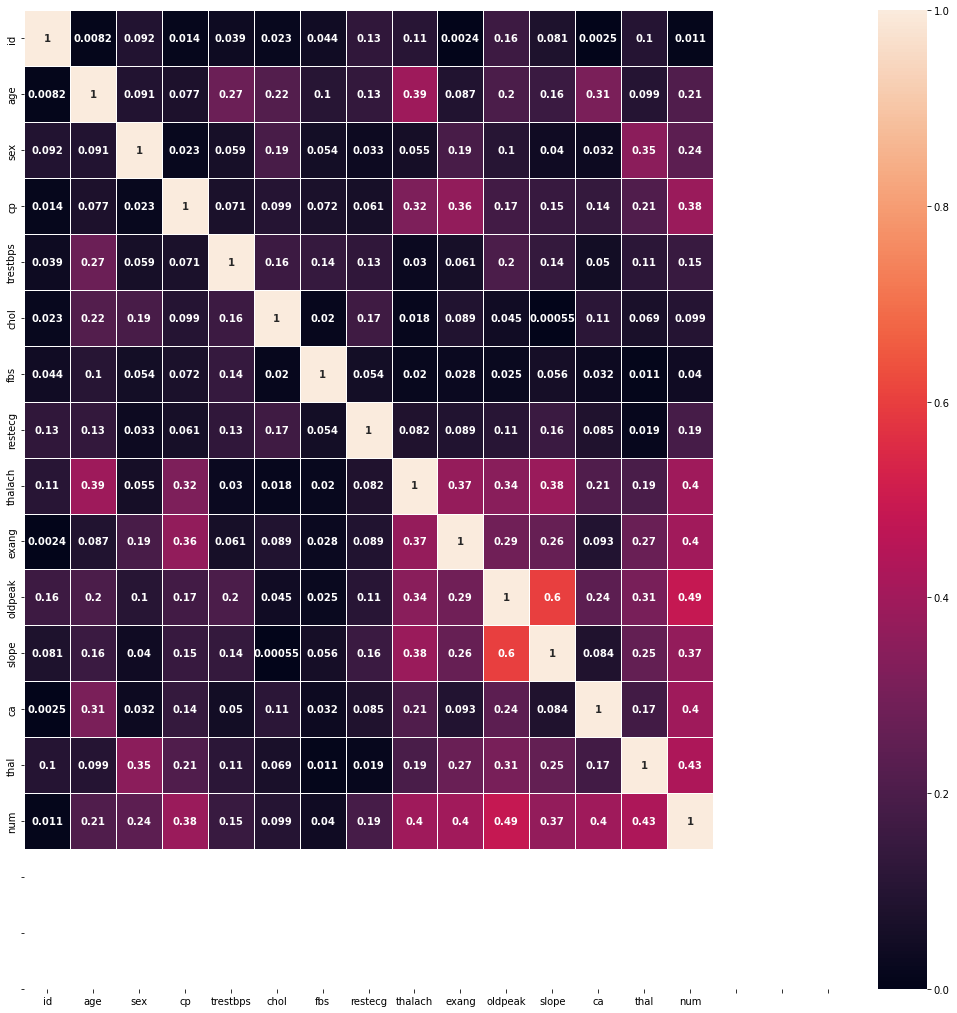

In [17]:
corr=forest.corr()
corr
correction=abs(corr)
fig = plt.figure()
fig.set_size_inches(18, 18)
ax = sns.heatmap(correction, linewidths=0.8,vmax=1, vmin=0 ,annot=True,annot_kws={'size':10,'weight':'bold'})
plt.xticks(np.arange(18)+0.5) 
plt.yticks(np.arange(18)+0.5) 
plt.show()


I want to remove the id, chol, fbs, these columns I considered as irrelevant attributes because their correlation in the end is smaller than 0.1,so those can be removed.

In [18]:
forest = forest.drop(forest.columns[[0,5,6,8]], axis = 1)
forest

,age,sex,cp,trestbps,restecg,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,2,0,2.3,3,0,6,0
1,67,1,4,160,2,1,1.5,2,3,3,2
2,67,1,4,120,2,1,2.6,2,2,7,1
3,37,1,3,130,0,0,3.5,3,0,3,0
4,41,0,2,130,2,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
277,39,0,3,138,0,0,0.0,2,0,3,0
278,57,1,2,154,2,0,0.0,1,1,3,1
279,58,0,4,130,0,0,0.6,2,0,3,0
280,57,1,4,110,0,1,3.0,2,1,7,2


***
## Section: 2.3 - Transform the attributes
- Consider transforming the remaining attributes (e.g., using the data dictionary to replace the numbers with text values for some attributes – this might or might not be useful), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

I don't think i have to transform the data，although some data is not perfect, it is still usable.I met change it in some an important decision or prediction.

Splitting the features and target

In [19]:
from sklearn.model_selection import train_test_split
x = forest.drop('num',axis =1)
y = forest['num']
print(x)

     age  sex  cp  trestbps  restecg  exang  oldpeak  slope  ca  thal
0     63    1   1       145        2      0      2.3      3   0     6
1     67    1   4       160        2      1      1.5      2   3     3
2     67    1   4       120        2      1      2.6      2   2     7
3     37    1   3       130        0      0      3.5      3   0     3
4     41    0   2       130        2      0      1.4      1   0     3
..   ...  ...  ..       ...      ...    ...      ...    ...  ..   ...
277   39    0   3       138        0      0      0.0      2   0     3
278   57    1   2       154        2      0      0.0      1   1     3
279   58    0   4       130        0      0      0.6      2   0     3
280   57    1   4       110        0      1      3.0      2   1     7
281   47    1   3       130        0      0      0.0      1   0     3

[282 rows x 10 columns]


Splitting the Data into training data and test data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(188, 10) (94, 10) (188,) (94,)


***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [22]:
# Instantiate learning model (k = 3)
knn_clf = KNeighborsClassifier(n_neighbors=3)
# Fitting the model
knn_clf.fit(x_train, y_train.squeeze())
# Predicting the Test set results
knn_y_pred = knn_clf.predict(x_test)
knn_y_pred



array([2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 2, 0, 0, 0, 0], dtype=int64)

In [23]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cm

array([[44,  2,  6,  0,  0],
       [12,  3,  0,  1,  0],
       [ 6,  1,  0,  0,  0],
       [13,  0,  1,  0,  0],
       [ 3,  1,  1,  0,  0]], dtype=int64)

In [24]:
# The accurary
knn_accuracy = accuracy_score(y_test, knn_y_pred)*100
print('Accuracy of our model is equal ' + str(round(knn_accuracy, 2)) + ' %.')

Accuracy of our model is equal 50.0 %.


In [25]:
calculate_net_benefit(knn_cm)


13000

***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [26]:
from sklearn.model_selection import cross_val_score, train_test_split
# creating list of K for KNN  and check it from 1 to 50

k_list = list(range(1,50,1))
# creating list of cv scores
knn_cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_scores = cross_val_score(knn, x_train, y_train.squeeze(), cv=7, scoring='accuracy')
    knn_cv_scores.append(knn_scores.mean())

In [27]:
knn_cv_scores[0:10]

[0.46764346764346765,
 0.5268620268620268,
 0.548026048026048,
 0.537037037037037,
 0.5588115588115589,
 0.5586080586080585,
 0.5693935693935693,
 0.5638990638990639,
 0.5638990638990639,
 0.5374440374440373]

<Figure size 432x288 with 0 Axes>

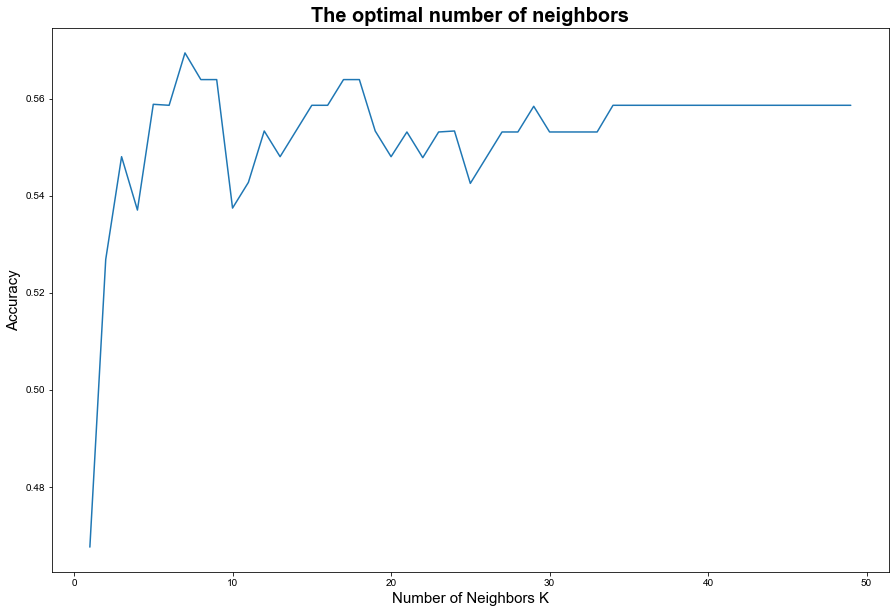

In [28]:
def optimal_knn_value (k_list, knn_cv_scores):

    plt.figure()
    plt.figure(figsize=(15,10))
    plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
    plt.xlabel('Number of Neighbors K', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    sns.set_style("whitegrid")
    plt.plot(k_list, knn_cv_scores)
    plt.show()
    
optimal_knn_value(k_list, knn_cv_scores)
    


***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

I think the data made KNN a bad choice, with the larger nums of the object, the bad influence will made into KNN model. In addition, the

fluctuation of prediction effect with the change of K also shows that the distribution of categories in the feature space is irregular 

which is also a reason that it's a bad choice.

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

Logistic Regression classifier

In [29]:
from sklearn.linear_model import LogisticRegression
# Modeling the dataset 
# Evaluation and accurary
LogR=LogisticRegression(max_iter=500)
LogR.fit(x_train,y_train)
y_pre=LogR.predict(x_test)
print(y_pre)
print(y_pre.shape)



[2 0 0 0 0 0 0 3 0 3 3 0 2 0 0 3 0 3 0 0 0 2 3 0 0 0 0 2 0 1 0 1 1 0 0 0 3
 3 0 0 3 3 0 0 0 0 0 1 1 0 2 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 4 0 0 0 0 0 0 3 1 1 0 3 2 0 2 0 0 0 0]
(94,)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
score=LogR.score(x_test,y_test)*100
print('Accuracy of our model is equal ' + str(round(score, 2)) + ' %.')

Accuracy of our model is equal 57.45 %.


In [31]:
conf_matrix1=confusion_matrix(y_test, y_pre)
calculate_net_benefit(conf_matrix1)


17800

In this part, I choose to use logistic regression classifier, I set the max inerations to 500 and modeling the dataset. Then I use the x_test to predict the y_pre(y_pred )and construct the confusion matrix .After that I get the score,which is 0.6170212765957447. Overall,it seems like the Logistic regression classifer is better than KNN. Logistic regression classifier has better acuuracy.

***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [32]:
LogR=LogisticRegression(max_iter=1000)
LogR.fit(x_train,y_train)
y_pre=LogR.predict(x_test)
print(y_pre)
print(y_pre.shape)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[2 0 0 0 0 0 0 3 2 2 3 0 2 1 0 3 0 3 0 0 0 2 2 0 0 0 0 2 0 1 0 0 1 0 0 0 3
 3 0 0 3 0 0 0 0 0 0 1 1 0 2 2 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 4 0 0 0 0 0 0 3 1 1 0 3 1 0 2 0 0 0 0]
(94,)


In [33]:
score=LogR.score(x_test,y_test)*100
print('Accuracy of our model is equal ' + str(round(score, 2)) + ' %.')

Accuracy of our model is equal 58.51 %.


In [34]:
conf_matrix1=confusion_matrix(y_test, y_pre)
calculate_net_benefit(conf_matrix1)

19600

In [35]:
LogR=LogisticRegression(max_iter=10000)
LogR.fit(x_train,y_train)
y_pre=LogR.predict(x_test)
print(y_pre)
print(y_pre.shape)


[2 0 0 0 0 0 0 3 2 2 3 0 1 4 0 3 0 4 0 0 0 0 2 0 0 0 0 2 0 4 0 0 4 0 0 0 4
 4 0 0 3 0 0 0 0 0 0 1 1 0 2 2 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 4 0 0 0 0 0 0 3 1 1 0 3 2 0 2 0 0 0 0]
(94,)


In [36]:
score=LogR.score(x_test,y_test)*100
print('Accuracy of our model is equal ' + str(round(score, 2)) + ' %.')

Accuracy of our model is equal 57.45 %.


In [37]:
conf_matrix1=confusion_matrix(y_test, y_pre)
calculate_net_benefit(conf_matrix1)

18100

***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

This  is a very good choice. I think a logistic regression classifier will perform well when the feature space is not very large, and it

doesn't have to care about the context of correlations between features.

Logistic regression classifiers are also a better choice if there will be a lot of new data in the future.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

Use the Random Forests classifier

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble


#Create a Gaussian Classifier
rf_clf=ensemble.RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(x_train,y_train.squeeze())
rf_y_pred=rf_clf.predict(x_test)
rf_y_pred

array([2, 0, 1, 0, 0, 0, 0, 3, 2, 3, 1, 0, 1, 1, 0, 2, 0, 4, 0, 0, 0, 3,
       1, 0, 0, 0, 0, 1, 0, 3, 0, 3, 4, 2, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2,
       0, 1, 0, 0, 0, 0], dtype=int64)

***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***


Confusion Martrix

In [39]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[46,  4,  1,  0,  1],
       [ 8,  2,  3,  3,  0],
       [ 1,  3,  1,  2,  0],
       [ 4,  6,  2,  1,  1],
       [ 1,  1,  1,  1,  1]], dtype=int64)

Accuracy

In [40]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100
print('Accuracy of our model is equal ' + str(round(rf_accuracy, 2)) + ' %.')

Accuracy of our model is equal 54.26 %.


Net Benefit

In [41]:
rf_benefit=calculate_net_benefit(rf_cm)
rf_benefit

15100

***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

The proportion of "0" is too large, and there are many other categories that are incorrectly predicted to be zero. By observing the 

accuracy and net income, we can also see that the performance of Random Forest is greater than that of KNN, but less than the Logistic 

Regression classifier. I think this is an option, but not a good choice or a bad choice.The dataset is not perfect, maybe should change

another and see what will happen.


***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?
***

For Accuracy, we have below

KNN (when k is 3) = 51.06 %.

Logistic Regression classifier = 61.7 %.

Random Forests = 59.57 %.








For Net Benefit, we also have below

KNN (when k is 3) = 15000

Logistic Regression classifier = 21800

Random Forests = 20000

Therefore, we compare these three classifiers to each other and we can see the Logistic Regression classifier has better Accuracy and also has better Net Benefit.



***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

I choose the Logistic Regression classifier as the best classifier.According to the results of the comparison in section6.1, the Logistic

Regression classifier has the best accuracy score and net benefit.And it is easy to fit different parameters in Logistic regression to

find the best results and prediction.That is, the other two models are difficult to do.Convenient observation sample  scores.And if there

will be a lot of new data in the future, the Logistic Regression classifier can also deal with this situation as well!

But no matter which classifier, it is not high accuracy, which is not what patients and we want to see, so it is not satisfactory....

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight? 
***

First of all, it was a very interesting exercise that taught me a lot about the application of classification. It gave me an idea of how

classifiers work in data sets. The data is not perfect, the class samples are unevenly distributed and have many attributes.But it still 

made me understand the advantages of different classifiers in different places. Also, I understand the advantages and disadvantages of

KNN classifier and logistics regression classifier. As I mentioned in last section,  no matter which classifier, it is not satisfactory. I 

will take what I learned today into the rest of my career and help more people predict better outcomes.

***
### END-OF-SUBMISSION
***